In [1]:
#Importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
global_temp_country = pd.read_csv('./GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('./GlobalLandTemperaturesByMajorCity.csv')
indian_cities = {'Ahmadabad', 'Bangalore' , 'Bombay' , 'Kanpur', 'Lakhnau', 'Nagpur', 'Madras','Pune', 'Calcutta' , 'Surat', 'New Delhi', 'Jaipur', 'Hyderabad'}

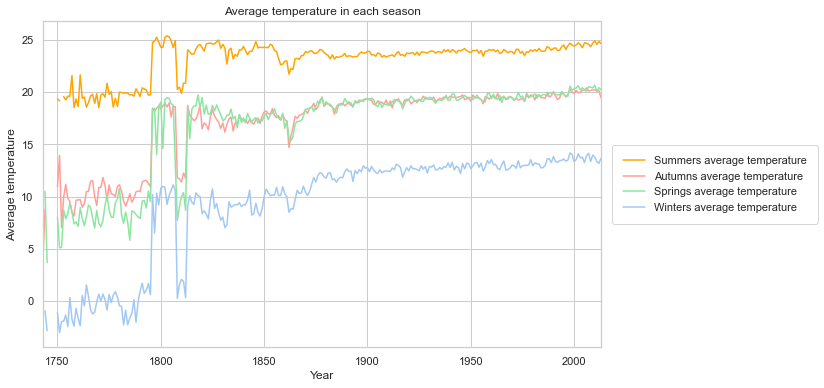

In [2]:
# Plotting average temperature during all the seasons in india
# drop unnecessary columns
global_temp = global_temp[['dt', 'City', 'AverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)
global_temp['City'] = global_temp['City']

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)    

In [3]:
# Plotting cities with highest temperature differences
temp_by_majorcity = pd.read_csv('./GlobalLandTemperaturesByMajorCity.csv')
cities = temp_by_majorcity['City'].unique()

indian_cities = {'Ahmadabad', 'Bangalore' , 'Bombay' , 'Kanpur', 'Lakhnau', 'Nagpur', 'Madras','Pune', 'Calcutta' , 'Surat', 'New Delhi', 'Jaipur', 'Hyderabad'}

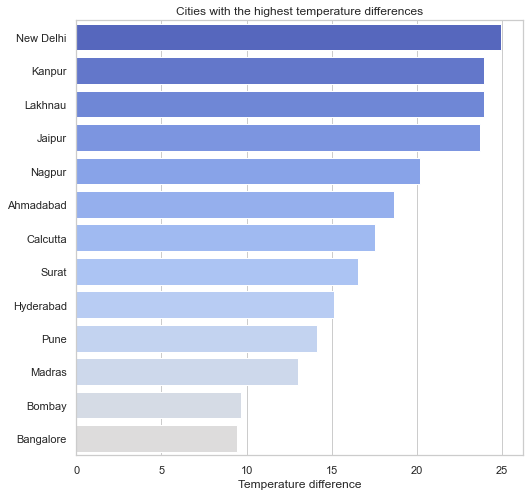

In [4]:
city_list = []
min_max_list = []

# getting max and min temps
for city in cities:
    if (city in indian_cities):
        ##print(city)
        curr_temps = temp_by_majorcity[temp_by_majorcity['City'] == city]['AverageTemperature']
        curr_temps_uncertain = temp_by_majorcity[temp_by_majorcity['City'] == city]['AverageTemperatureUncertainty']
        min_max_list.append((curr_temps.max(), curr_temps.min()))
        city_list.append(city)
    
# nan cleaning
res_min_max_list = []
res_cities = []
for i in range(len(min_max_list)):
    if not np.isnan(min_max_list[i][0]):
        res_min_max_list.append(min_max_list[i])
        res_cities.append(city_list[i])

# calc differences        
differences = []

for tpl in res_min_max_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_cities = (list(x) for x in zip(*sorted(zip(differences, res_cities), key=lambda pair: pair[0], reverse=True)))

# ploting cities with temperature difference
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_cities[:14], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Cities with the highest temperature differences")

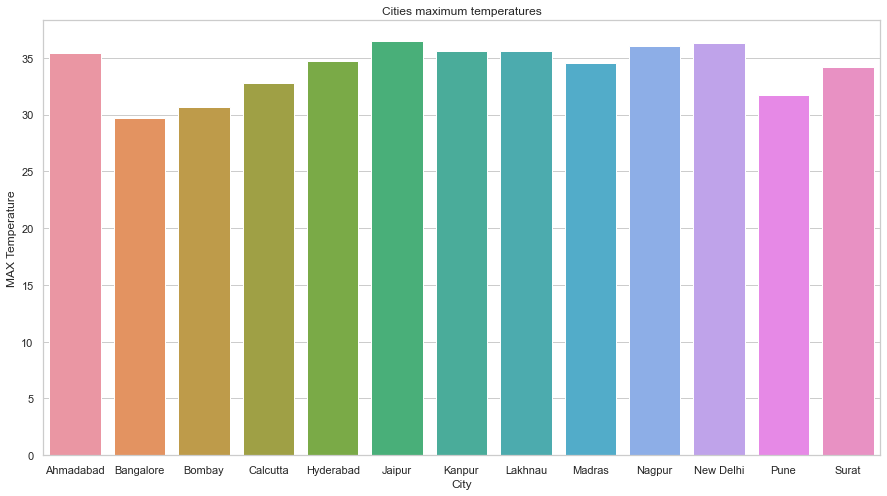

In [5]:
# Cities maximum temperatures
min_max_majorcity = pd.DataFrame(temp_by_majorcity)

max_majorcity = min_max_majorcity.groupby(['City']).max()['AverageTemperature']
max_majorcity = max_majorcity.to_frame().reset_index()
max_majorcity.columns = ['City','City Maximum']
max_majorcity = max_majorcity.loc[max_majorcity['City'].isin(indian_cities)]

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='City',y='City Maximum', data=max_majorcity.reset_index())
texts = ax.set(ylabel="MAX Temperature", xlabel="City", title="Cities maximum temperatures")

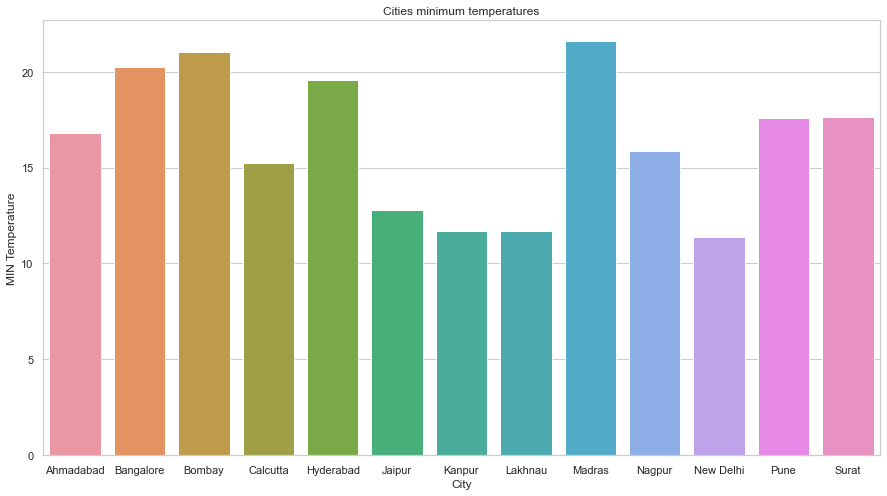

In [6]:
min_majorcity = min_max_majorcity.groupby(['City'],as_index=True).min()['AverageTemperature']
min_majorcity = min_majorcity.to_frame().reset_index()
min_majorcity.columns = ['City','City Minimum']
##print(min_majorcity)
min_majorcity = min_majorcity.loc[min_majorcity['City'].isin(indian_cities)]

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='City',y='City Minimum', data=min_majorcity.reset_index())
texts = ax.set(ylabel="MIN Temperature", xlabel="City", title="Cities minimum temperatures")

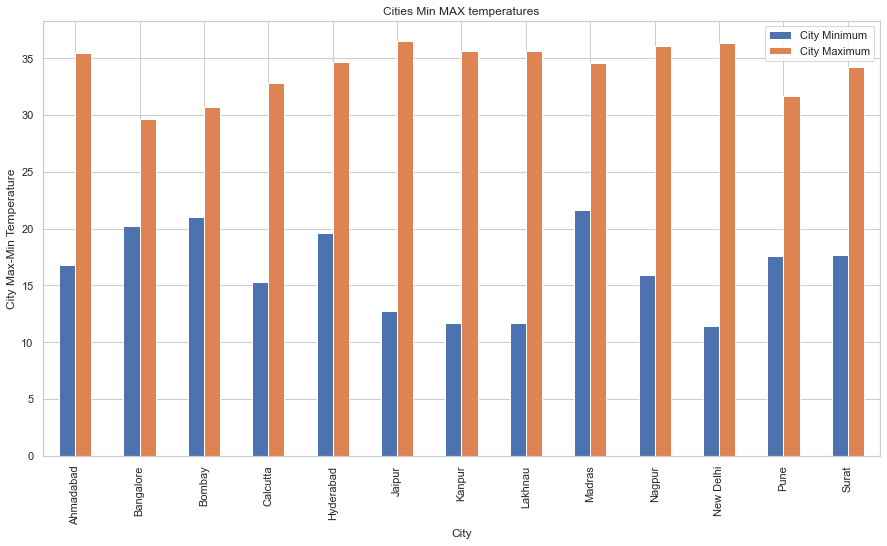

In [7]:
# Comparing the maximum and minimum temperatures of different states
##Merging the two data sets
min_max_majorcity_merge = pd.merge(min_majorcity , max_majorcity)
min_max_majorcity_merge = min_max_majorcity_merge.set_index('City')
##print(min_max_majorcity_merge)

ax = min_max_majorcity_merge.plot(kind='bar',stacked=False, figsize=(15, 8))

texts = ax.set(ylabel="City Max-Min Temperature", xlabel="City", title="Cities Min MAX temperatures")

In [8]:
# Average land temperature across the globe
global_temp = pd.read_csv("./GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [9]:
#Removing duplicate countries
#Replacing union territorries by country
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]
layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [10]:
# Average land temperatures across different continents
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
global1=pd.read_csv('GlobalTemperatures.csv')
global1=global1[['dt','LandAverageTemperature']]
global1.dropna(inplace=True)
global1['dt']=pd.to_datetime(global1.dt).dt.strftime('%d/%m/%Y')
global1['dt']=global1['dt'].apply(lambda x:x[6:])
global1=global1.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()
trace=go.Scatter(
    x=global1['dt'],
    y=global1['LandAverageTemperature'],
    mode='lines',
    )
data=[trace]

py.iplot(data, filename='line-mode')

In [13]:
global2=pd.read_csv('GlobalTemperatures.csv')
global2=global2[['dt','LandAverageTemperature']]
global2.dropna(inplace=True)
global2['dt']=pd.to_datetime(global2.dt).dt.strftime('%d/%m/%Y')
global2['month']=global2['dt'].apply(lambda x:x[3:5])
global2['year']=global2['dt'].apply(lambda x:x[6:])
global2=global2[['month','year','LandAverageTemperature']]
global2['month']=global2['month'].map({'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
def plot_month(month1,month2):
    a=global2[global2['month']==month1]
    b=global2[global2['month']==month2]
    trace0 = go.Scatter(
    x = a['year'],
    y = a['LandAverageTemperature'],
    mode = 'lines',
    name = month1
    )
    
    trace1 = go.Scatter(
    x = b['year'],
    y = b['LandAverageTemperature'],
    mode = 'lines',
    name = month2
    )
    data = [trace0,trace1]
    py.iplot(data, filename='line-mode')
plot_month('Aug','Nov')

Text(0, 0.5, 'Country')

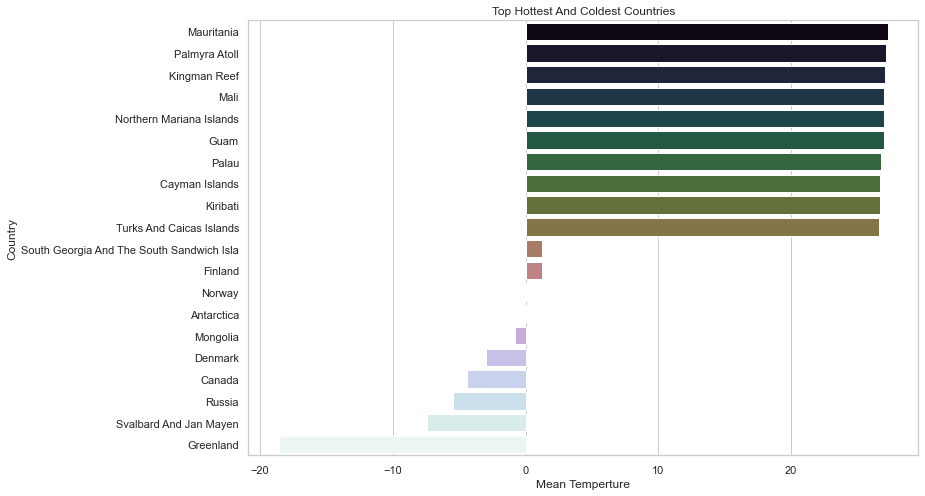

In [14]:
temp_country=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_country['Country'].replace({'Denmark (Europe)':'Denmark','France (Europe)':'France','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'Europe'},inplace=True)
temp_country.fillna(0,inplace=True)
temp_country1=temp_country.groupby(['Country'])['AverageTemperature'].mean().reset_index()
hot=temp_country1.sort_values(by='AverageTemperature',ascending=False)[:10]
cold=temp_country1.sort_values(by='AverageTemperature',ascending=True)[:10]
top_countries=pd.concat([hot,cold])
top_countries.sort_values('AverageTemperature',ascending=False,inplace=True)
f,ax=plt.subplots(figsize=(12,8))
sns.barplot(y='Country',x='AverageTemperature',data=top_countries,palette='cubehelix',ax=ax).set_title('Top Hottest And Coldest Countries')
plt.xlabel('Mean Temperture')
plt.ylabel('Country')

<AxesSubplot:xlabel='dt'>

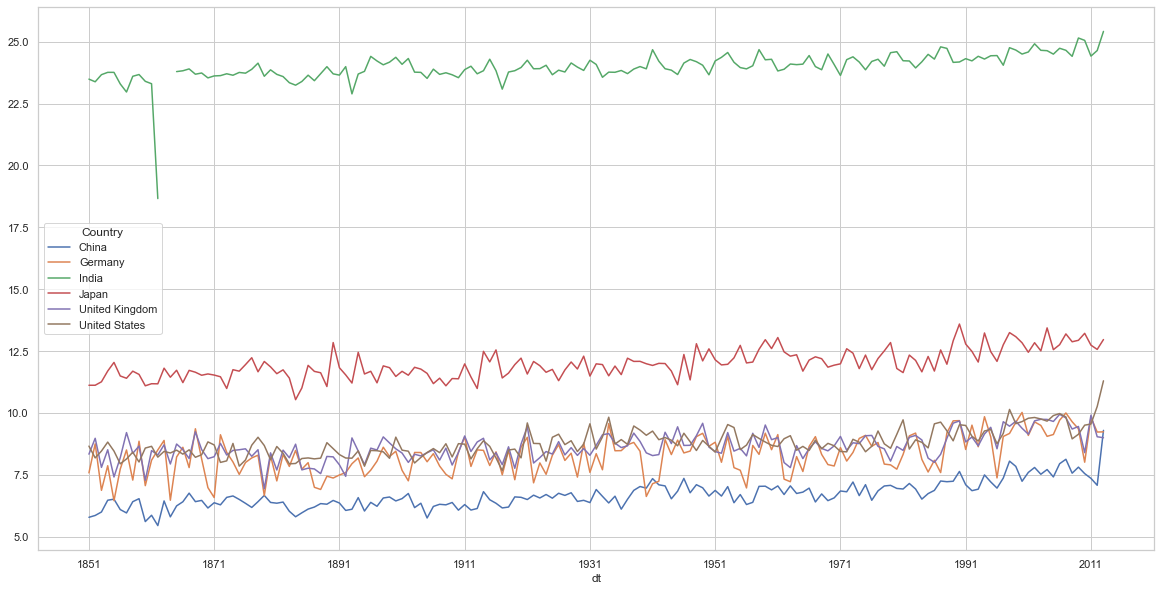

In [15]:
countries=temp_country.copy()
countries['dt']=pd.to_datetime(countries.dt).dt.strftime('%d/%m/%Y')
countries['dt']=countries['dt'].apply(lambda x: x[6:])
countries=countries[countries['AverageTemperature']!=0]
countries.drop('AverageTemperatureUncertainty',axis=1,inplace=True)
li=['United States','China','India','Japan','Germany','United Kingdom']
countries=countries[countries['Country'].isin(li)]
countries=countries.groupby(['Country','dt'])['AverageTemperature'].mean().reset_index()
countries=countries[countries['dt'].astype(int)>1850]
abc=countries.pivot('dt','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
abc.plot(ax=ax)

In [16]:
cities=pd.read_csv('GlobalLandTemperaturesByCity.csv')
cities.dropna(inplace=True)
cities['year']=cities['dt'].apply(lambda x: x[:4])
cities['month']=cities['dt'].apply(lambda x: x[5:7])
cities.drop('dt',axis=1,inplace=True)
cities=cities[['year','month','AverageTemperature','City','Country','Latitude','Longitude']]
cities['Latitude']=cities['Latitude'].str.strip('N')
cities['Longitude']=cities['Longitude'].str.strip('E')
cities.head()

,year,month,AverageTemperature,City,Country,Latitude,Longitude
0,1743,11,6.068,Århus,Denmark,57.05,10.33
5,1744,04,5.788,Århus,Denmark,57.05,10.33
6,1744,05,10.644,Århus,Denmark,57.05,10.33
7,1744,06,14.051,Århus,Denmark,57.05,10.33
8,1744,07,16.082,Århus,Denmark,57.05,10.33


In [17]:
indian_cities=cities[cities['Country']=='India']
indian_cities=indian_cities[indian_cities['year']>'1850']
major_cities=indian_cities[indian_cities['City'].isin(['Bombay','New Delhi','Bangalore','Hyderabad','Calcutta','Pune','Madras','Ahmadabad'])]
heatmap=major_cities.groupby(['City','month'])['AverageTemperature'].mean().reset_index()
trace = go.Heatmap(z=heatmap['AverageTemperature'],
                   x=heatmap['month'],
                   y=heatmap['City'],
                  colorscale='Viridis')
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [19]:
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')
rio = cities.loc[cities['City'] == 'New Delhi', ['dt','AverageTemperature']]
rio.columns = ['Date','Temp']
rio['Date'] = pd.to_datetime(rio['Date'])
rio.reset_index(drop=True, inplace=True)
rio.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
rio = rio.loc['1900':'2013-01-01']
rio = rio.asfreq('M', method='bfill')
rio.head()

,Temp
Date,
1900-01-31,17.648
1900-02-28,25.467
1900-03-31,28.327
1900-04-30,32.911
1900-05-31,35.305


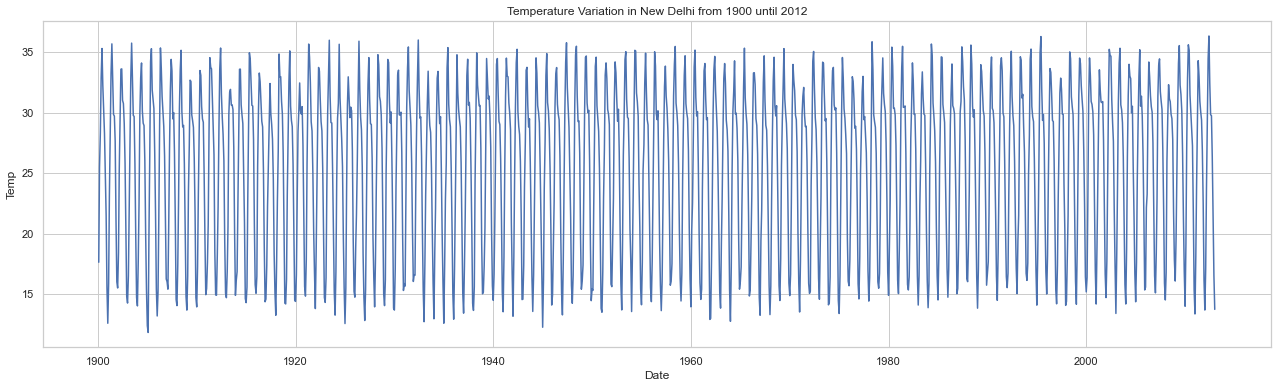

In [20]:
plt.figure(figsize=(22,6))
sns.lineplot(x=rio.index, y=rio['Temp'])
plt.title('Temperature Variation in New Delhi from 1900 until 2012')
plt.show()

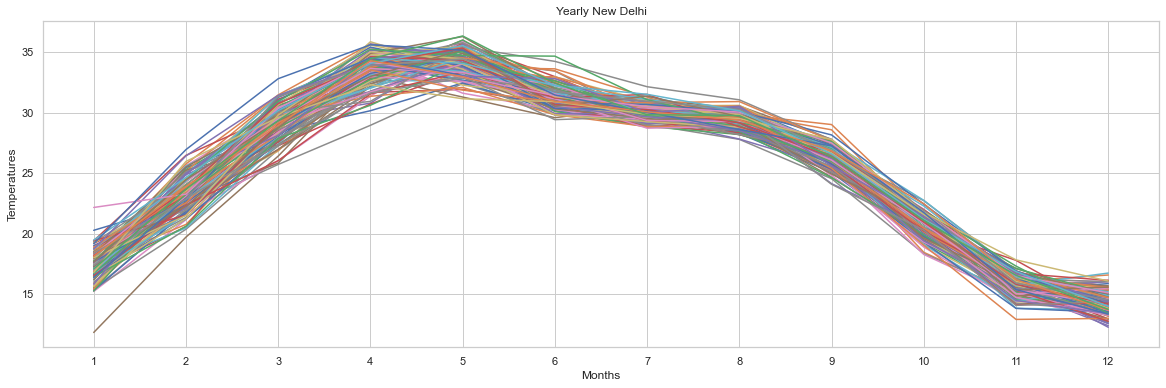

In [21]:
rio['month'] = rio.index.month
rio['year'] = rio.index.year
pivot = pd.pivot_table(rio, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly New Delhi')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

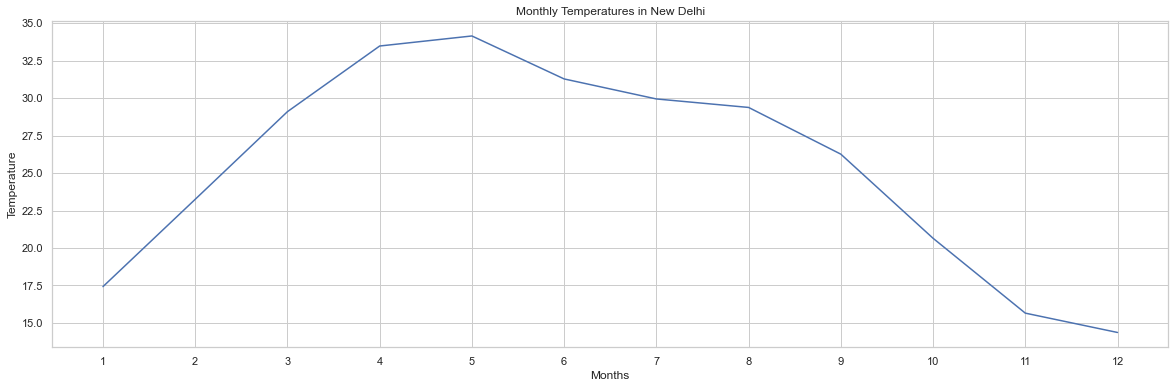

In [22]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in New Delhi')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

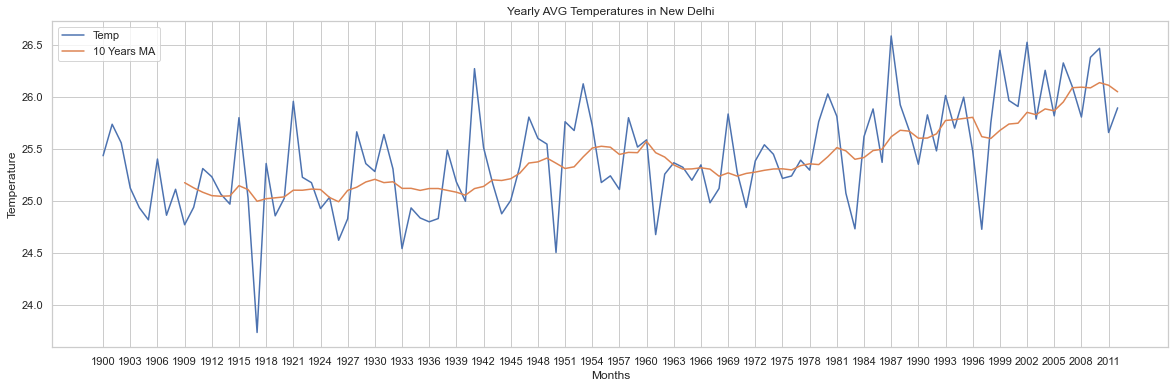

In [23]:
year_avg = pd.pivot_table(rio, values='Temp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['Temp'].rolling(10).mean()
year_avg[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in New Delhi')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [24]:
train = rio[:-60].copy()
val = rio[-60:-12].copy()
test = rio[-12:].copy()

In [25]:
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2008-02-29    16.809
2008-03-31    25.979
2008-04-30    29.609
2008-05-31    32.313
2008-06-30    31.151
Freq: M, Name: Temp, dtype: float64

In [26]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 3.981 celsius degrees


In [27]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('New Delhi Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
        
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -4.6402
p-value                           0.0001
Lags Used                        23.0000
Number of Observations Used    1272.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


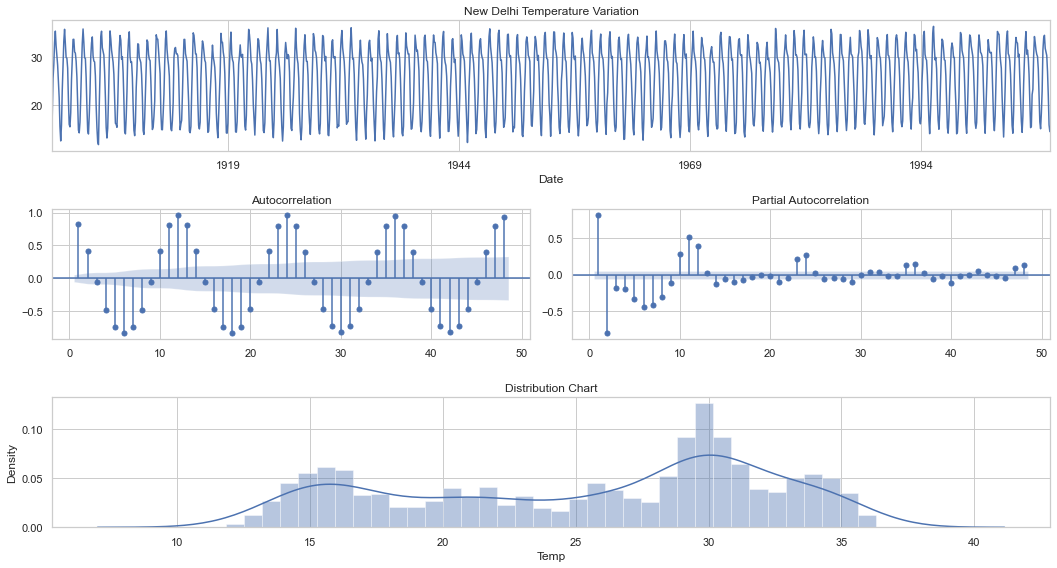

In [28]:
check_stationarity(train['Temp'])

Results of Dickey-Fuller Test:
Test Statistic                  -12.4752
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1260.0000
Critical Value (1%)              -3.4356
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


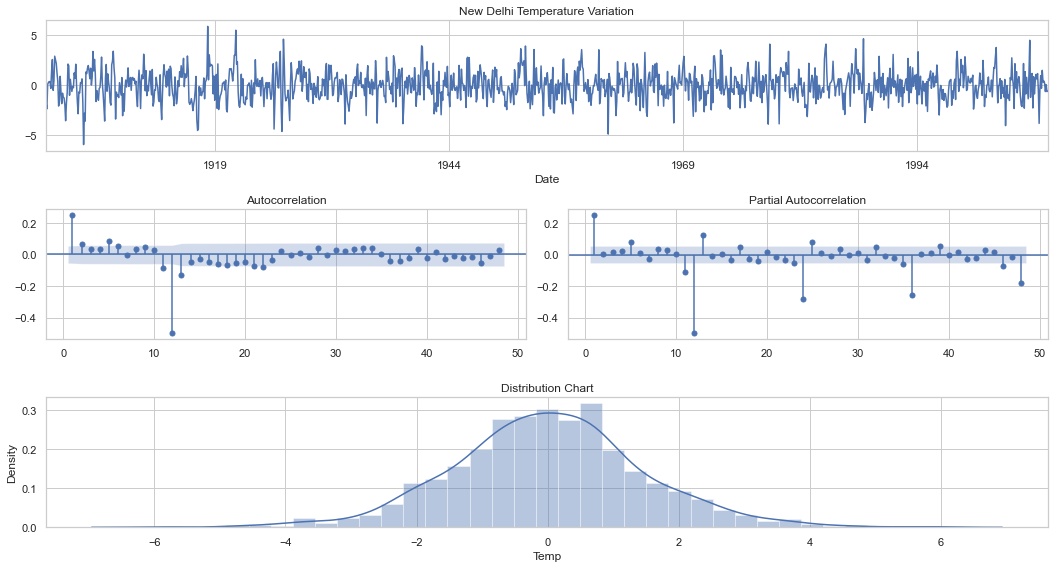

In [29]:
check_stationarity(train['Temp'].diff(12).dropna())

In [30]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [31]:
val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((3,0,0),(0,1,1,12),'c'))

In [32]:
rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 1.0978 celsius degrees
It's a decrease of -72.42% in the RMSE


In [33]:
val['Error'] = val['Temp'] - val['Pred']

In [34]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
        
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [35]:
val.drop(['month','year'], axis=1, inplace=True)
val.head()


,Temp,Pred,Error
Date,,,
2008-01-31,16.809,17.989697,-1.180697
2008-02-29,25.979,23.246822,2.732178
2008-03-31,29.609,30.263403,-0.654403
2008-04-30,32.313,33.801271,-1.488271
2008-05-31,31.151,34.102982,-2.951982


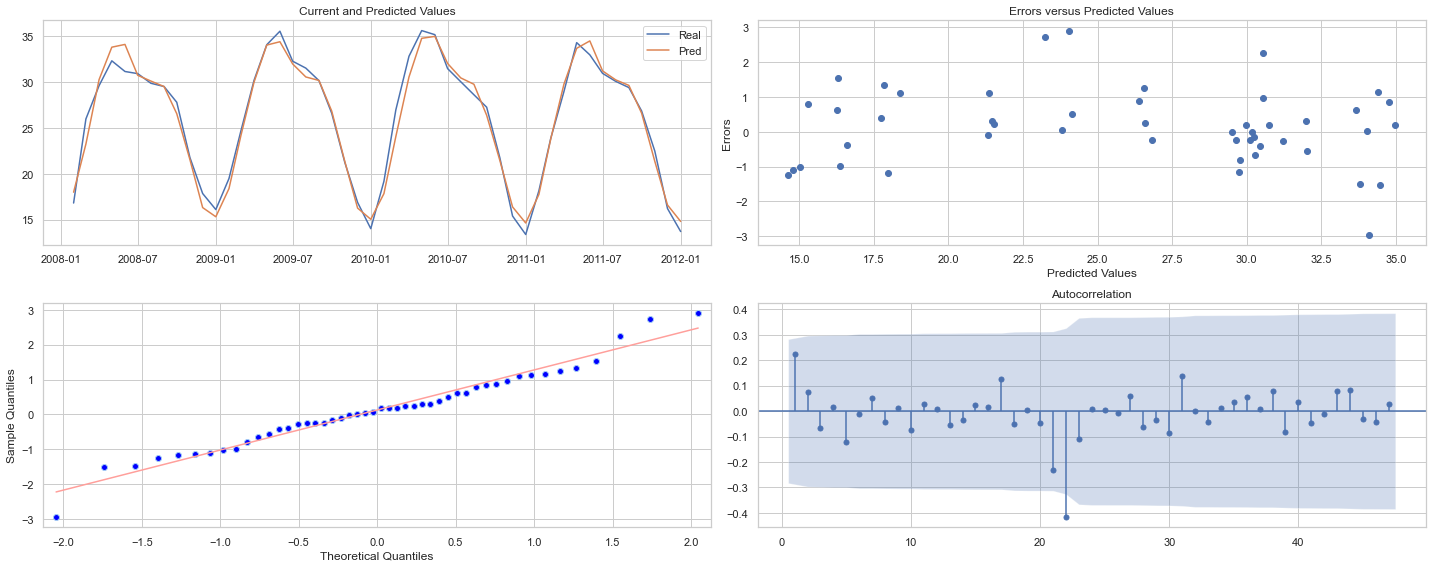

In [36]:
plot_error(val)

In [37]:
future = pd.concat([train['Temp'], val['Temp']])
future.head()

Date
1900-01-31    17.648
1900-02-28    25.467
1900-03-31    28.327
1900-04-30    32.911
1900-05-31    35.305
Freq: M, Name: Temp, dtype: float64

In [38]:
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

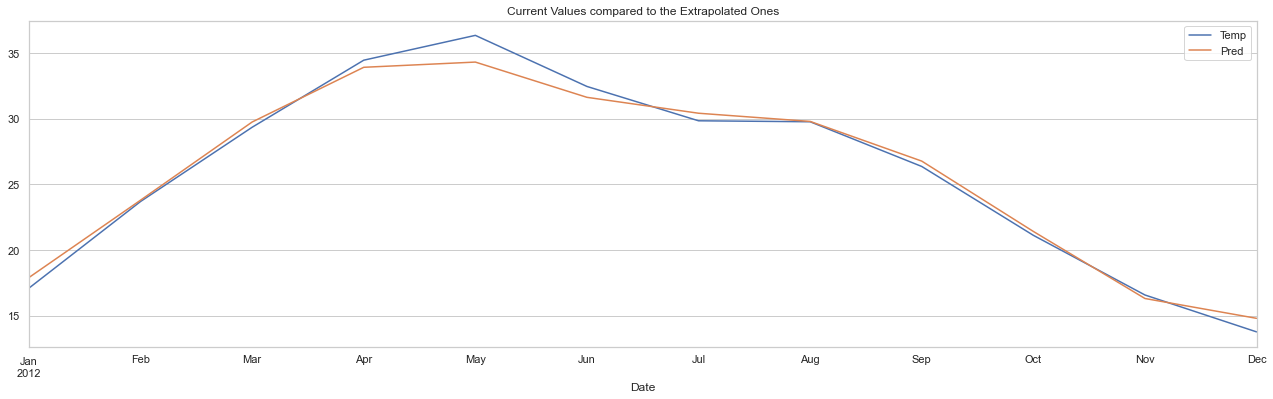

In [39]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))
test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()